In [2]:
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

주성분 분석(Principal Component Analysis, PCA)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
print(pca.components_.shape)

(50, 10000)


In [5]:
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

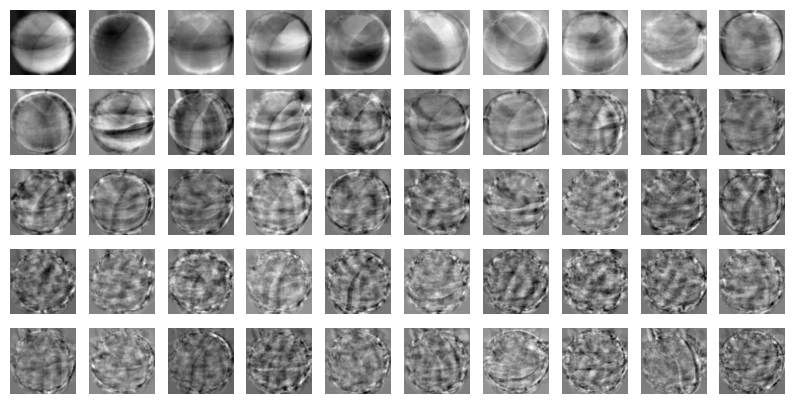

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [7]:
print(fruits_2d.shape)

(300, 10000)


In [8]:
fruits_pca = pca.transform(fruits_2d) # PCA 변환을 통해서 10000차원의 데이터를 50차원으로 줄임
fruits_pca.shape

(300, 50)

In [9]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

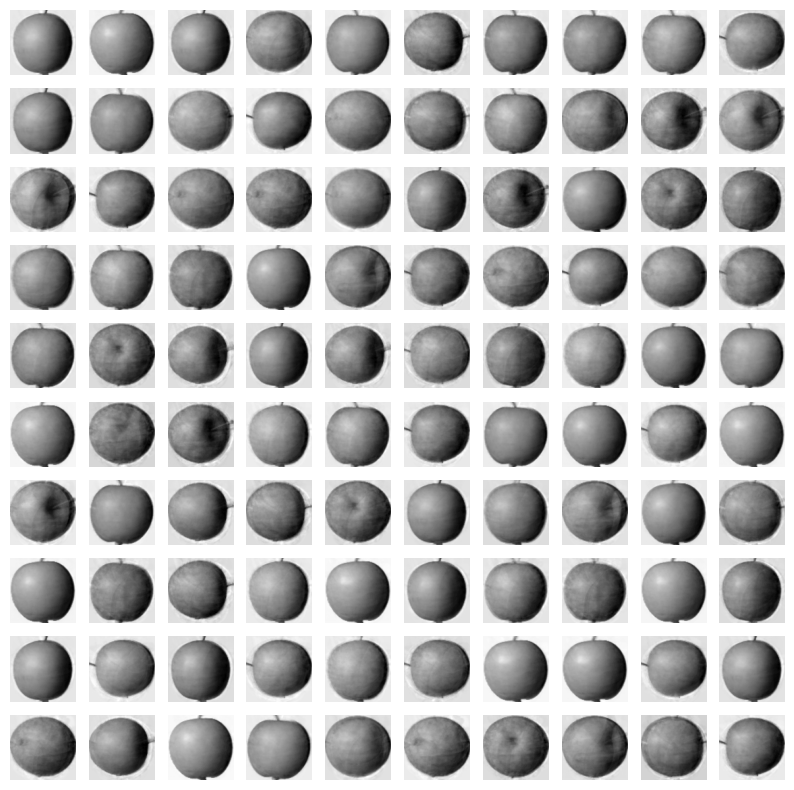

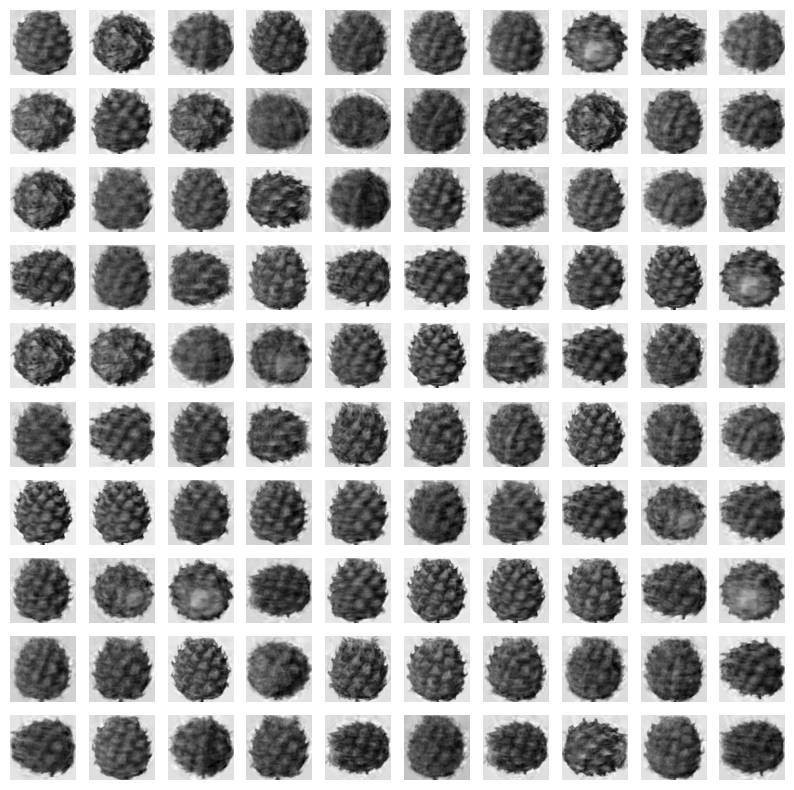

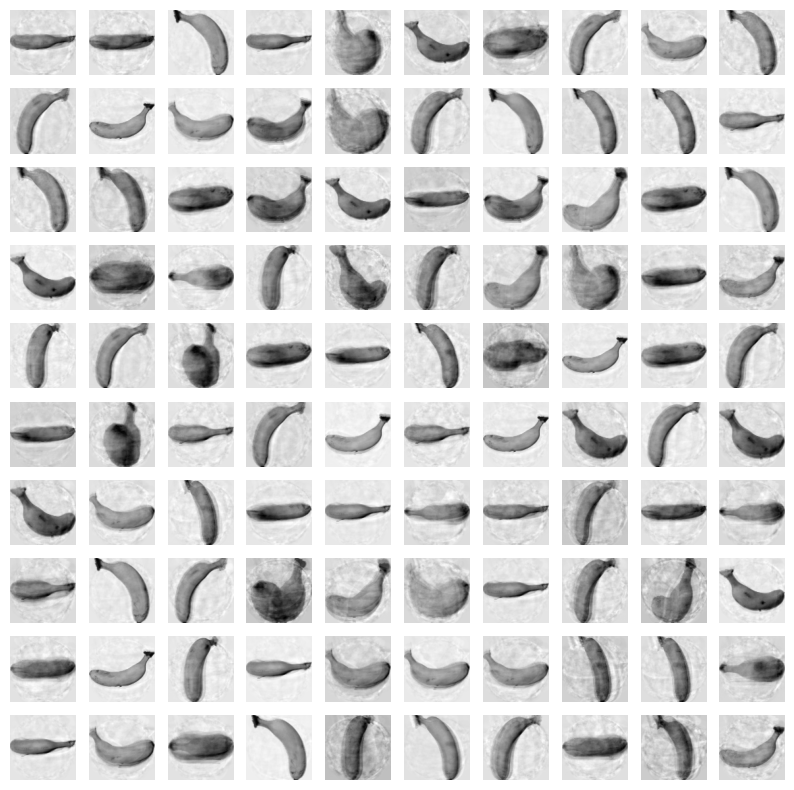

In [10]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])

In [11]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645189, 0.00578896, 0.00511202, 0.00486383, 0.00480346,
       0.00447833, 0.00437315, 0.00408039, 0.00389471, 0.00372442,
       0.00359292, 0.00331464, 0.00317839, 0.00304326, 0.00303764,
       0.00288935, 0.00275877, 0.00264987, 0.002558  , 0.00251913,
       0.00247393, 0.0023913 , 0.00230887, 0.00222295, 0.00216386,
       0.00214104, 0.00196279, 0.00193109, 0.00190728, 0.00185207,
       0.00182844, 0.00172384, 0.00169479, 0.00162139, 0.00161219])

In [12]:
np.sum(pca.explained_variance_ratio_)

0.9215890636893849

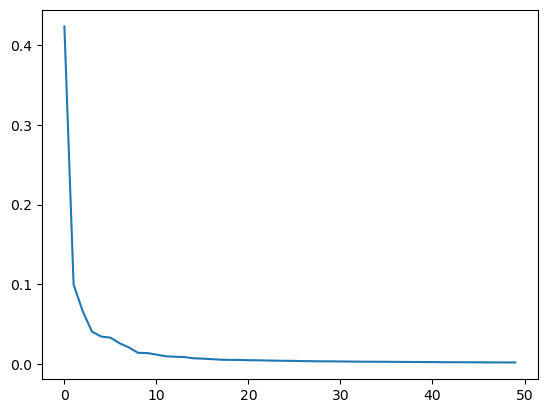

In [13]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [14]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [17]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.2832367420196533


In [18]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.014003324508666991


In [19]:
pca = PCA(n_components=0.8)
pca.fit(fruits_2d)

PCA(n_components=0.8)

In [20]:
print(pca.n_components_)

14


In [21]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 14)

In [22]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.013402700424194336


In [23]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)

In [24]:
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

C:\Users\kimhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kimhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


(array([0, 1, 2]), array([ 91,  98, 111], dtype=int64))


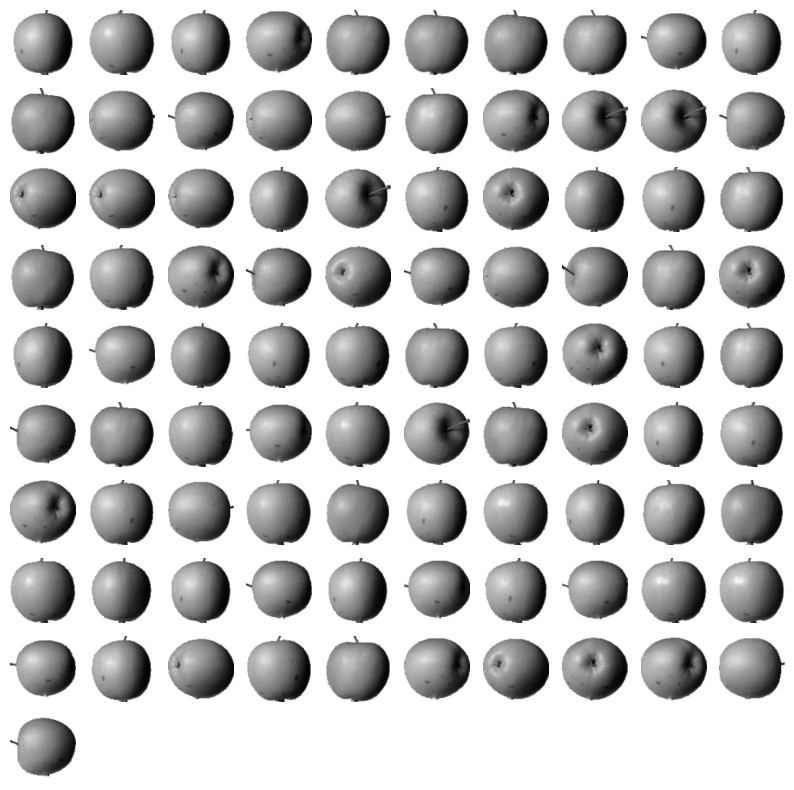

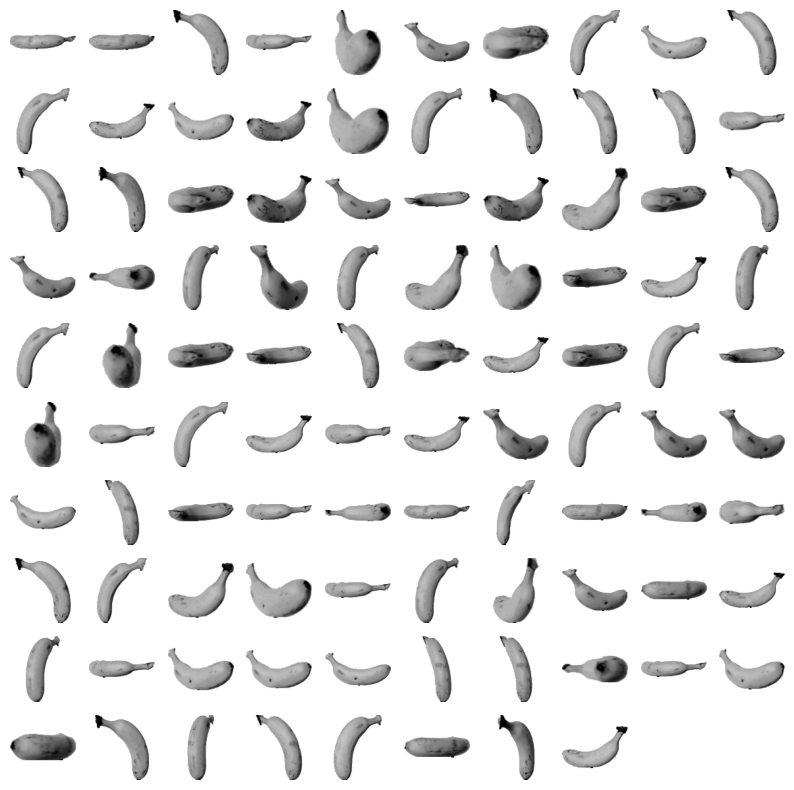

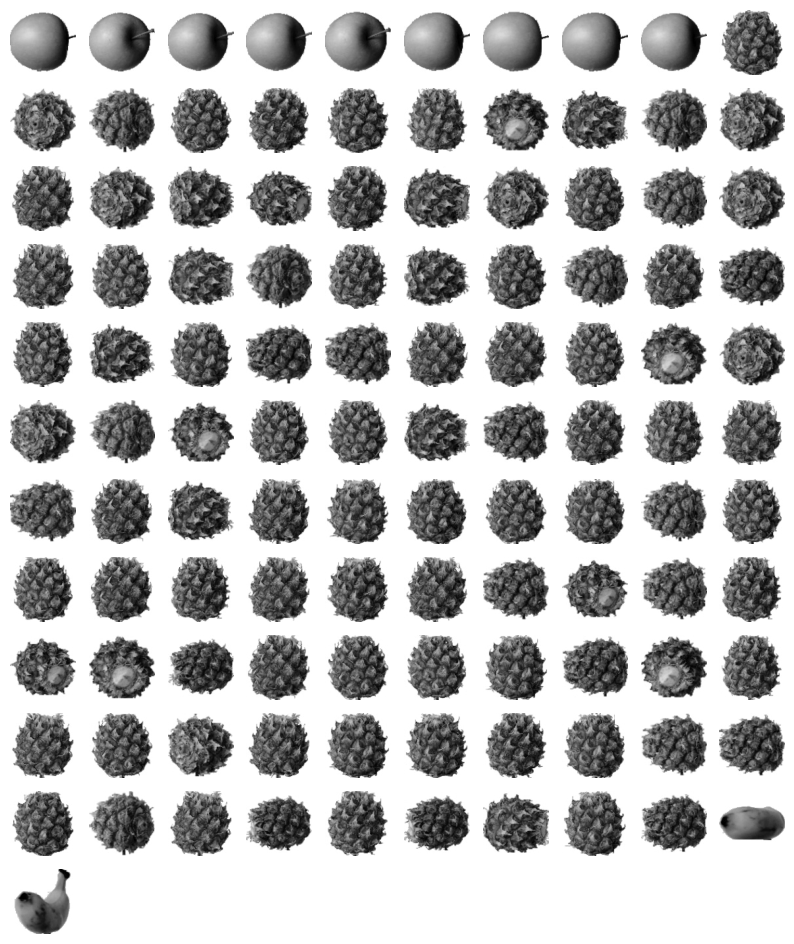

In [25]:
for label in range(3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

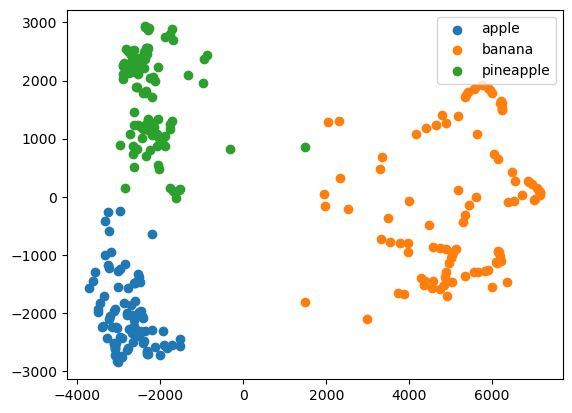

In [26]:
for label in range(3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()